In [1]:
camera=94716

In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files

In [70]:
import keras
import tensorflow as tf
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
#from keras.layers import BatchNormalization
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import auc
from keras.losses import mse
import math

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

#Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing



#Sampling Libraries
from imblearn.over_sampling import SMOTE 

#Imputation Libraries
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Data
from sklearn.datasets import load_boston

#Costant Value
from sklearn.feature_selection import VarianceThreshold

#Encoding Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


In [72]:
import keras
import tensorflow as tf
from keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape
#from keras.layers import BatchNormalization
from keras.models import Model
from keras.datasets import mnist
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import seaborn as sns

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing



#Sampling Libraries
from imblearn.over_sampling import SMOTE 

#Imputation Libraries
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Data
from sklearn.datasets import load_boston

#Costant Value
from sklearn.feature_selection import VarianceThreshold

#Encoding Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


In [74]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.losses import mse, binary_crossentropy, kl_divergence
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from tqdm import tqdm

In [7]:
%cd /content/drive/My Drive/SRH Heidelberg/Case Study 1/Codes-Sasha/00-Data/thermal_images/94716

/content/drive/My Drive/SRH Heidelberg/Case Study 1/Codes-Sasha/00-Data/thermal_images/94716


In [8]:
faulty_data=np.load(f"all_faulty_{camera}.npy")
healthy_data=np.load(f"healthy_{camera}.npy")

In [9]:
max=healthy_data.max()
min=healthy_data.min()
healthy_data=(healthy_data-min)/(max-min)
max=faulty_data.max()
min=faulty_data.min()
faulty_data=(faulty_data-min)/(max-min)

In [10]:
np.random.shuffle(faulty_data)
np.random.shuffle(healthy_data)

In [11]:
index=faulty_data.shape[0]
X_test=healthy_data[:index]
X=healthy_data[index:]
X_train=X[:round(X.shape[0]*.8)]
X_val=X[round(X.shape[0]*.8):]
X_fehler_test=faulty_data
test_data = np.concatenate((X_test,X_fehler_test),axis = 0)

In [12]:
print(f"""shape of data:
X_train-->{X_train.shape[0]}
X_val-->{X_val.shape[0]}
X_test-->{X_test.shape[0]}
X_fehler_test-->{X_fehler_test.shape[0]}
test_data-->{test_data.shape[0]}""")

shape of data:
X_train-->926
X_val-->231
X_test-->956
X_fehler_test-->956
test_data-->1912


In [13]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2], 1)

In [14]:
from keras.models import Sequential, Model
from keras.layers import Input, Reshape, Dense, Dropout, UpSampling2D, Conv2D, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam_v2
from keras import backend as K
from keras import initializers
import tensorflow as tf
import numpy as np
from tqdm import tqdm

In [15]:
def generator_model():
    generator = Sequential()
    generator.add(Dense(128 * 8 * 8, input_dim=100, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    generator.add(LeakyReLU(0.2))
    generator.add(Reshape((8, 8, 128)))
    generator.add(UpSampling2D(size=(2, 2)))
    generator.add(Conv2D(64, kernel_size=(5, 5), padding='same'))
    generator.add(LeakyReLU(0.2))
    generator.add(UpSampling2D(size=(2, 2)))
    generator.add(Conv2D(1, kernel_size=(5, 5), padding='same', activation='tanh'))
    optimizer=adam_v2.Adam()
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

In [16]:
def discriminator_model():
    discriminator = Sequential()
    discriminator.add(Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='same', input_shape=(32,32, 1),
                             kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    discriminator.add(Conv2D(128, kernel_size=(5, 5), strides=(2, 2), padding='same'))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    discriminator.add(Flatten())
    discriminator.add(Dense(1, activation='sigmoid'))
    optimizer = adam_v2.Adam()
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [17]:
def generator_containing_discriminator(g, d):
    d.trainable = False
    ganInput = Input(shape=(100,))
    x = g(ganInput)
    ganOutput = d(x)
    gan = Model(inputs=ganInput, outputs=ganOutput)
    optimizer = adam_v2.Adam()
    gan.compile(loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [18]:
def train(BATCH_SIZE, X_train):
    d = discriminator_model()
    print("#### discriminator ######")
    d.summary()
    g = generator_model()
    print("#### generator ######")
    g.summary()
    d_on_g = generator_containing_discriminator(g, d)
    d.trainable = True
    for epoch in tqdm(range(200)):
        for index in range(int(X_train.shape[0] / BATCH_SIZE)):
            noise = np.random.uniform(0, 1, size=(BATCH_SIZE, 100))
            image_batch = X_train[index * BATCH_SIZE:(index + 1) * BATCH_SIZE]
            generated_images = g.predict(noise, verbose=0)
            X = np.concatenate((image_batch, generated_images))
            y = np.array([1] * BATCH_SIZE + [0] * BATCH_SIZE)
            d_loss = d.train_on_batch(X, y)
            noise = np.random.uniform(0, 1, (BATCH_SIZE, 100))
            d.trainable = False
            g_loss = d_on_g.train_on_batch(noise, np.array([1] * BATCH_SIZE))
            d.trainable = True
        g.save_weights('assets/generator', True)
        d.save_weights('assets/discriminator', True)
    return d, g

In [19]:
def generate(BATCH_SIZE):
    g = generator_model()
    g.load_weights('assets/generator')
    noise = np.random.uniform(0, 1, (BATCH_SIZE, 100))
    generated_images = g.predict(noise)
    return generated_images


In [20]:
def sum_of_residual(y_true, y_pred):
    return tf.reduce_sum(abs(y_true - y_pred))

In [21]:
def feature_extractor():
    d = discriminator_model()
    d.load_weights('assets/discriminator')
    intermidiate_model = Model(inputs=d.layers[0].input, outputs=d.layers[-5].output)
    optimizer = adam_v2.Adam()
    intermidiate_model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return intermidiate_model

In [22]:
def anomaly_detector():
    g = generator_model()
    g.load_weights('assets/generator')
    g.trainable = False
    intermidiate_model = feature_extractor()
    intermidiate_model.trainable = False

    aInput = Input(shape=(100,))
    gInput = Dense((100))(aInput)
    G_out = g(gInput)
    D_out = intermidiate_model(G_out)
    model = Model(inputs=aInput, outputs=[G_out, D_out])
    optimizer = adam_v2.Adam()
    model.compile(loss=sum_of_residual, loss_weights=[0.9, 0.1], optimizer=optimizer)
    return model


In [23]:
def compute_anomaly_score(model, x):
    z = np.random.uniform(0, 1, size=(1, 100))
    intermidiate_model = feature_extractor()
    d_x = intermidiate_model.predict(x)
    loss = model.fit(z, [x, d_x], epochs=500, verbose=0)
    similar_data, _ = model.predict(z)
    return loss.history['loss'][-1], similar_data

In [24]:
#Model_d, Model_g =train(32,X_train)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


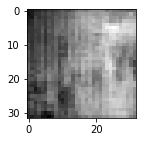

In [25]:
## generate random image 

generated_img =generate(3)
plt.figure(figsize=(2, 2))
plt.imshow(generated_img[0].reshape(32, 32),cmap=plt.cm.gray)
plt.show()

In [26]:
def score_calc(X_test):
    score_list=[]
    X_test = X_test.astype(np.float32)/255.
    X_test = X_test.reshape(-1, 32, 32, 1)
    for i in range(0, X_test.shape[0]):
      test_img = X_test[i]
      model = anomaly_detector()
      ano_score, similar_img = compute_anomaly_score(model, test_img.reshape(1, 32, 32, 1))
      score_list.append(ano_score)
    return np.array(score_list)

In [30]:
score_train=score_calc(X_train)
score_normal=score_calc(X_test)
score_anomaly=score_calc(X_fehler_test)

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


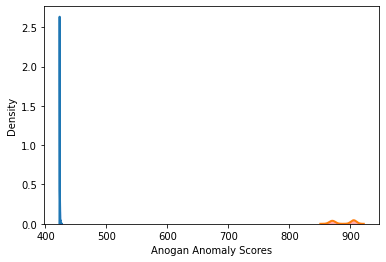

In [110]:
ax=sns.distplot(score_train, hist=False, kde=True, 
             bins=int(200),fit_kws={"color":"blue"},
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax=sns.distplot(score_anomaly, hist=False, kde=True, 
             bins=int(200),fit_kws={"color":"red"}, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
ax.set(xlabel='Anogan Anomaly Scores', ylabel='Density')
l1 = ax.lines[0]
l2 = ax.lines[1]

x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]
x2 = l2.get_xydata()[:,0]
y2 = l2.get_xydata()[:,1]
ax.fill_between(x1,y1, color="blue", alpha=0.3)
ax.fill_between(x2,y2, color="red", alpha=0.3)
plt.savefig(f'dist{camera}.png')
plt.show(block=False)

In [53]:
def create_dataset(normal_reconstructions,anomally_reconstructions):
  dataset=np.row_stack((np.column_stack((normal_reconstructions,np.ones((normal_reconstructions.shape[0],),dtype=np.int64))),np.column_stack((anomally_reconstructions,np.zeros((anomally_reconstructions.shape[0],),dtype=np.int64)))))
  df=pd.DataFrame(dataset,columns=['reconstructions','label'])
  df = df.sample(frac=1).reset_index(drop=True)
  return df


In [56]:
df=create_dataset(np.array(score_normal),np.array(score_anomaly))

In [57]:
df.head()

,reconstructions,label
0,47.316110,0.0
1,48.548680,0.0
2,0.264270,1.0
3,0.479722,1.0
4,0.118614,1.0


In [64]:
test_scores=df.reconstructions.to_numpy()
test_labels=df.label.to_numpy()
y_actual=df.label.to_numpy()
train_scores=np.array(score_train)

#Area under the curve (AUC) of the Receiver Operating Characteristic (ROC)

In [75]:
class Classifier:
  def classify(self,test_recon_error,threshold):
    if test_recon_error < threshold:
      pred_label = 1
    else:
       pred_label = 0
    return (pred_label)
  def metrics(self,y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)):
      if y_actual[i] == y_pred[i] == 1:
        TP += 1
      elif y_pred[i] == 1 and y_actual[i] != y_pred[i]:
        FP += 1
      elif y_actual[i] == y_pred[i] == 0:
        TN +=1
      elif y_pred[i] == 0 and y_actual[i] != y_pred[i]:
        FN+=1

    return (TP, FP,TN,FN)


In [76]:
classifier = Classifier()
tpr=[]
fpr=[]
thresholds=[]


for threshold in np.linspace(train_scores.min(),train_scores.max(),num=30):
  y_pred=[]
  for error in test_scores:
    pred_label= classifier.classify(error,threshold)
    y_pred.append(pred_label)
  TP,FP,TN,FN = classifier.metrics(y_actual,y_pred)
  tpr.append(TP/(TP+FN))
  fpr.append(FP/(FP+TN))
  thresholds.append(threshold)

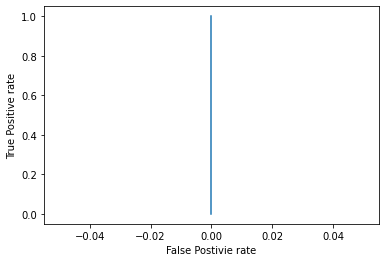

In [77]:
plt.plot(fpr,tpr)
plt.xlabel("False Postivie rate")
plt.ylabel("True Positive rate")
plt.show()

In [78]:
y_pred=[]
threshold = train_scores.max()

for error in test_scores:
    pred_label= classifier.classify(error,threshold)
    y_pred.append(pred_label)


auc_max = roc_auc_score(np.array(test_labels),np.array(y_pred))
print ("auc = " , auc_max)

auc =  1.0


In [79]:
y_pred=[]
threshold = 0.9*train_scores.max()

for error in test_scores:
    pred_label= classifier.classify(error,threshold)
    y_pred.append(pred_label)


auc_90 = roc_auc_score(np.array(test_labels),np.array(y_pred))
print ("auc = " , auc_90)

auc =  1.0


#Accuracy

In [80]:
y_pred=[]
for error in test_scores:
    pred_label= classifier.classify(error,0.9*train_scores.max())
    y_pred.append(pred_label)
TP,FP,TN,FN = classifier.metrics(y_actual,y_pred)
accuracy_max=(TP+TN)/(TP+FP+TN+FN)
recall_max=TP/(TP+FN)
precision_max=TP/(TP+FP)
print(accuracy_max)

1.0
